Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitize and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [1]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#### load the movie and credit and create their dataframes

credits_df = pd.read_csv('Credit.txt',sep=" ")
movies_df = pd.read_csv('movies.csv')


### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'homepage', 'overview', 'production_companies', 'original_title', 'title_y'] from the data set as they will not be used in the analysis.

In [3]:
# Remove the redundant or unnecessary columns
movies_df = movies_df.drop(columns=['keywords',
                        'homepage',
                        'status',
                        'tagline',
                        'original_language',
                        'homepage',
                        'overview',
                        'production_companies',
                        'original_title'
                       ])

#### Remove any duplicate rows

In [4]:
# Remove any rows that have the same data in all columns
movies_df = movies_df.drop_duplicates(keep='first')

#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [5]:
# Remove any entries that have a zero budget or zero revenue
movies_df = movies_df[movies_df['budget'] > 0]
movies_df = movies_df[movies_df['revenue'] > 0]

#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [6]:
# Change the release_date column to DateTime column
movies_df['date_parsed'] = pd.to_datetime(movies_df['release_date'], format='%Y-%m-%d')
movies_df = movies_df.drop(['release_date'],axis=1)

# Extract the release year from every release date
movies_df['year'] = pd.DatetimeIndex(movies_df['date_parsed']).year

#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [7]:
# Change columns format to integer
movies_df['budget'] = movies_df['budget'].astype('int64')
movies_df['revenue'] = movies_df['revenue'].astype('int64')

movies_df.dtypes

budget                           int64
genres                          object
id                               int64
popularity                     float64
production_countries            object
revenue                          int64
runtime                        float64
spoken_languages                object
title                           object
vote_average                   float64
vote_count                       int64
date_parsed             datetime64[ns]
year                             int64
dtype: object

On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

In [8]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index,column]=str(list1)
    
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
parse_col_json('production_countries', 'name')

movies_df = movies_df.reset_index()
movies_df.head()

,index,budget,genres,id,popularity,production_countries,revenue,runtime,spoken_languages,title,vote_average,vote_count,date_parsed,year
0,0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009-12-10,2009
1,1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007-05-19,2007
2,2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015-10-26,2015
3,3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012-07-16,2012
4,4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],284139100,132.0,['English'],John Carter,6.1,2124,2012-03-07,2012


### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

Text(0.5, 1.0, '5 Biggest & Smallest Budgets')

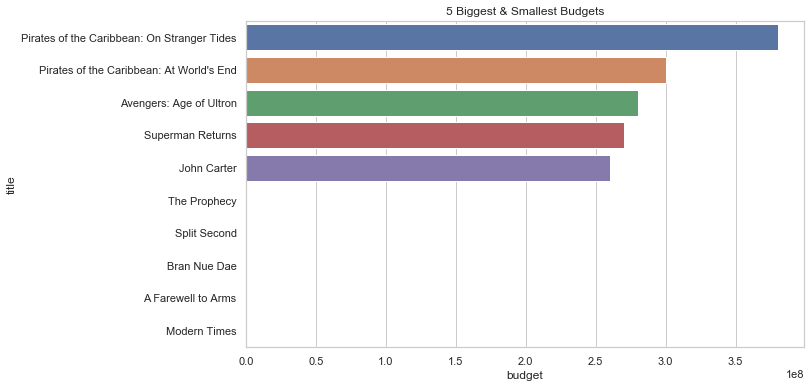

In [9]:
# 5 biggest budgets and 5 smallest budgets 
movies_budgetSort = movies_df.sort_values('budget',ascending=False)
movies_budgetHeadTail = movies_budgetSort.head().append(movies_budgetSort.tail())
movies_budgetHeadTail

fig = plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.barplot(y="title", x="budget", data=movies_budgetHeadTail).set_title('5 Biggest & Smallest Budgets')

#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

Text(0.5, 1.0, '5 Most & Least Profitable Movies')

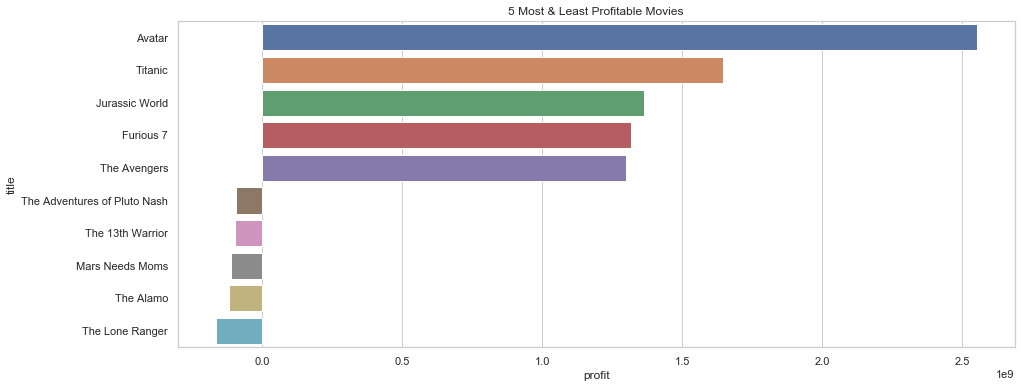

In [10]:
# 5 most profitable and 5 least profitable movies
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
movies_profitSort = movies_df.sort_values('profit',ascending=False)
movies_profitHeadTail = movies_profitSort.head().append(movies_profitSort.tail())

fig = plt.figure(figsize=(15,6))
sns.set(style="whitegrid")
sns.barplot(y="title", x="profit", data=movies_profitHeadTail).set_title('5 Most & Least Profitable Movies')

#### Find the most talked about movies. Sort the dataframe based on the popularity column.

Text(0.5, 1.0, '10 Most Popular Movies')

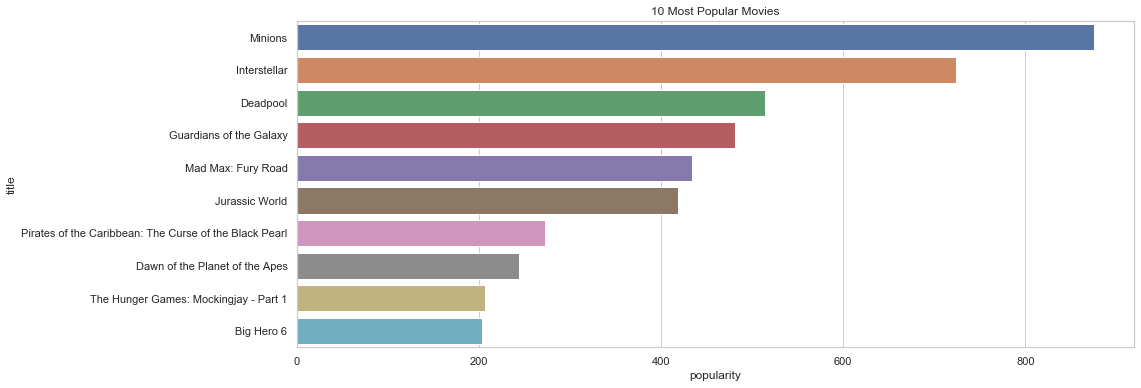

In [11]:
# 10 most popular movies
movies_popularSort = movies_df.sort_values('popularity',ascending=False)

fig = plt.figure(figsize=(15,6))
sns.set(style="whitegrid")
sns.barplot(y="title", x="popularity", data=movies_popularSort.head(10)).set_title('10 Most Popular Movies')

#### Find Movies which are rated above 7



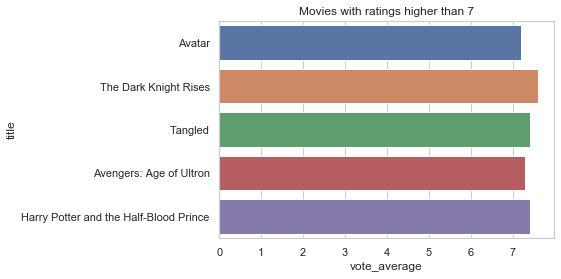

In [12]:
# Movies with a rating higher than 7
movies_ratings = movies_df[movies_df['vote_average'] > 7]

sns.barplot(y="title", x="vote_average", data=movies_ratings.head()).set_title('Movies with ratings higher than 7');

#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

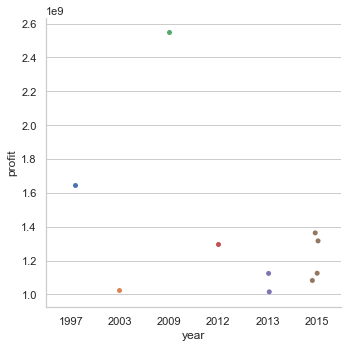

In [13]:
# Which year had the most profitable movies
sns.set(style="whitegrid")
sns.catplot(x="year", y="profit", data=movies_profitSort.head(10));

#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

In [14]:
# Convert genre column to lists
movies_genres = movies_df
movies_genres.genres = movies_genres.genres.map(ast.literal_eval)
movies_genres = pd.Series(np.concatenate(movies_genres.genres))

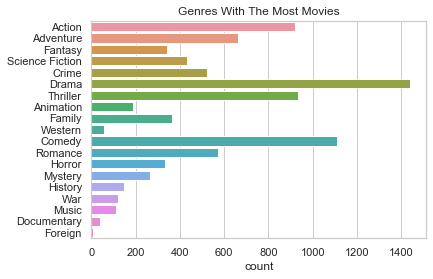

In [15]:
# Genres with the most movies
sns.countplot(y=movies_genres).set_title('Genres With The Most Movies');

This shows the number of entries for each genre, showing that audiences prefer to watch drama, comedy, thriller, and action movies. Although these genres have the most entries, it does not necessarily show how much money they earned.

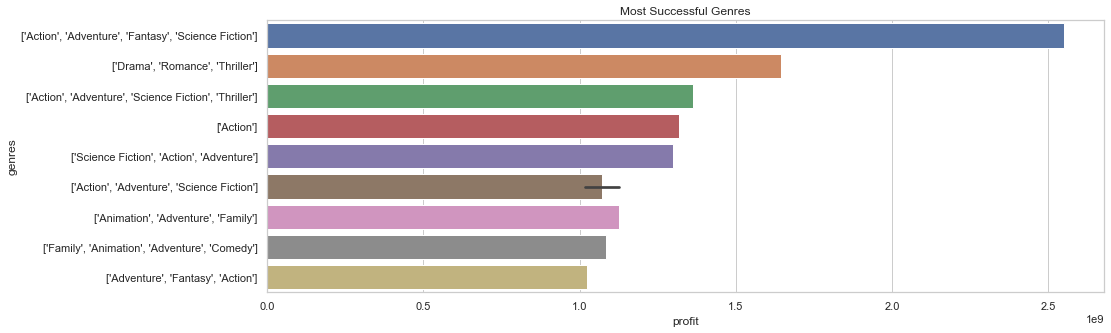

In [38]:
# Which genres made the most money
fig = plt.figure(figsize=(15,5))
sns.barplot(y="genres", x="profit", data=movies_profitSort.head(10)).set_title('Most Successful Genres');

Many movies have a combination of genres, as opposed to being just one genre type, so this plot shows the genre combinations that made the most profits.

Text(0.5, 1.0, 'Ratings For The Most And Least Profitable Movies')

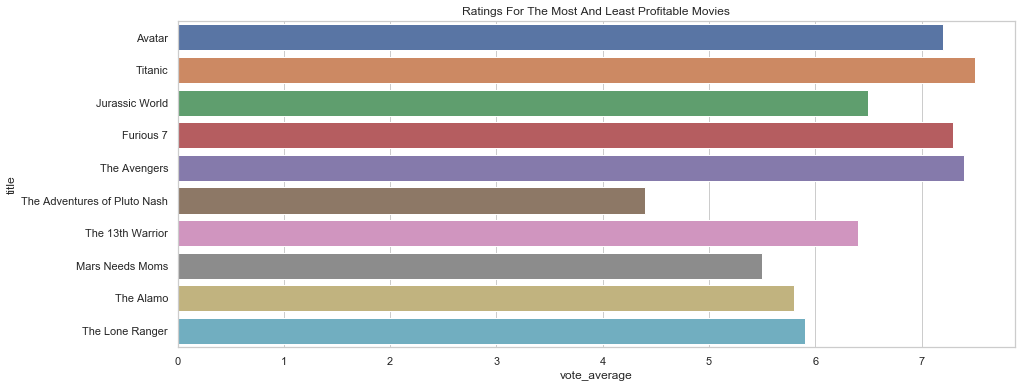

In [28]:
#### Generate three different interesting visualizations with a data story.
# Ratings of the movies that made the most and least profits
fig = plt.figure(figsize=(15,6))
sns.set(style="whitegrid")
sns.barplot(y="title", x="vote_average", data=movies_profitHeadTail).set_title('Ratings For The Most And Least Profitable Movies')

Even though this plot shows the movies that made the most profits and the least profits, their ratings are not too far apart. You would almost expect the movies that earned the least profits to have really bad ratings, but instead they are comparable to those at the top, despite them being billions of dollars apart.

Text(0.5, 1.0, 'Number Of Movies Per Year')

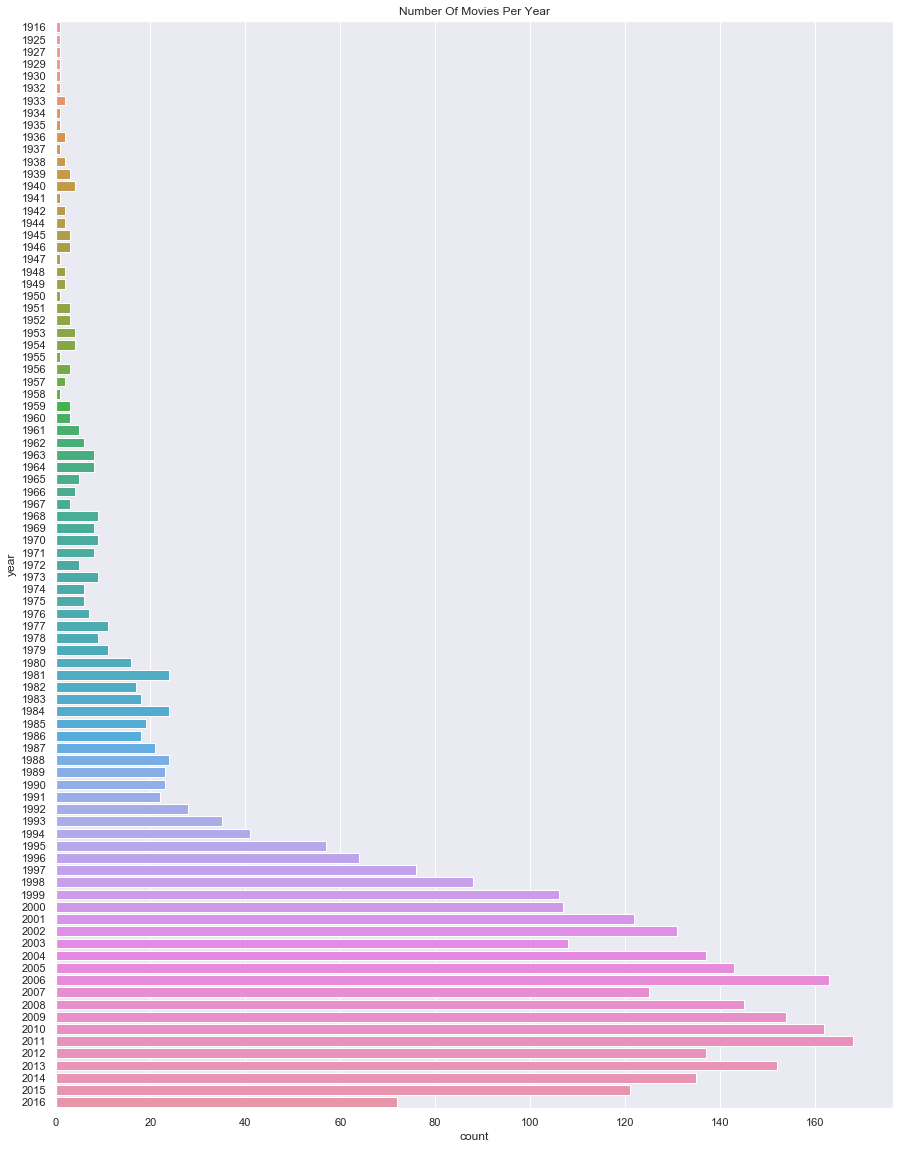

In [55]:
# How many movies per year
plt.figure(figsize=(15,20))
sns.countplot(y='year',data=movies_df).set_title('Number Of Movies Per Year')

As we can see, the number of movies each year gradually increased, presumably as the technology become less expensive and more available. We can see a big jump in the 1990s, where the decade began with a little over 20 movies per year, to ending the decade with over 100 movies in the final year. Let's see how this impacted the profits movies made each year.

Text(0.5, 1.0, 'Profits Made Each Year')

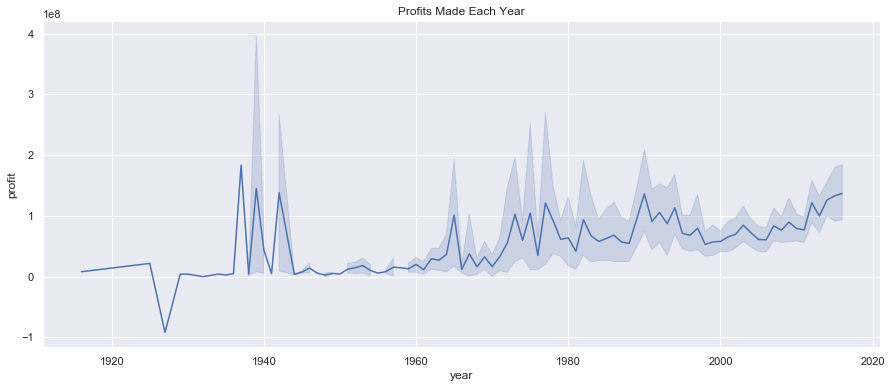

In [56]:
# How much profit was made each year
plt.figure(figsize=(15,6))
sns.lineplot(y='profit',x='year',data=movies_df).set_title('Profits Made Each Year')

Even though the number of movies increased over the decades, the profits do not seem to match the growth. After 1960, the profits per year appear to become erratic, but there does not seem to be any correlation with the spike in the 1990s as seen in the previous graph.

# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualizations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)